<a href="https://colab.research.google.com/github/kakarlarenusree/renu_project_Heart-Disease-Risk-Prediction/blob/main/Heartdisease_risk_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Comparative Study of Explainable Machine Learning Models for Heart Disease Risk Prediction

# Exploratory Data Analysis (EDA)

This section presents an exploratory analysis of the UCI Heart Disease dataset.
The objective of the EDA is to understand the structure, quality, and key
characteristics of the data before applying machine learning models.

The analysis focuses on:
- Dataset structure and missing values
- Target variable distribution
- Univariate and bivariate feature analysis
- Correlation and outlier detection

These insights guide preprocessing decisions and model selection in later stages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


## Dataset Description

The dataset used in this study is the Cleveland Heart Disease dataset obtained
from the UCI Machine Learning Repository. It contains clinical measurements
related to cardiovascular health and is widely used in medical machine learning
research.


In [2]:
column_names = [
    "age", "sex", "cp", "trestbps", "chol",
    "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

df = pd.read_csv(
    "/content/drive/MyDrive/processed.cleveland.data",
    names=column_names,
    na_values="?"
)

df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## Data Structure and Overview

This subsection examines the number of observations, feature types,
and potential missing values in the dataset.


In [3]:
print("Dataset shape:", df.shape)
df.info()


Dataset shape: (303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


## Missing Values

Identifying missing values is essential, as they can influence model
performance and preprocessing decisions.


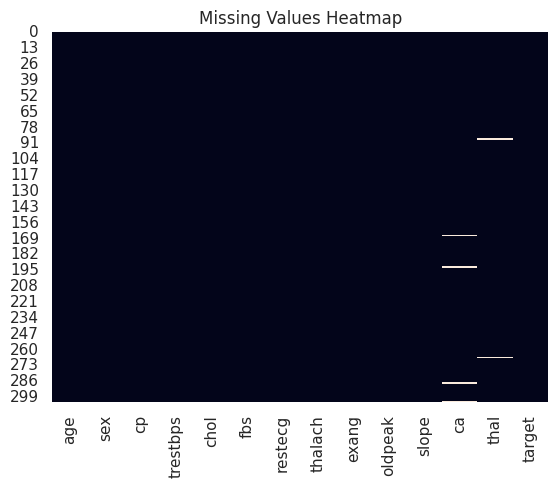

In [4]:
df.isnull().sum()
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

## Target Variable

In the original dataset, the target variable ranges from 0 to 4.
For binary classification, the target is converted into:
- 0: No heart disease
- 1: Presence of heart disease

This transformation is consistent with existing literature.


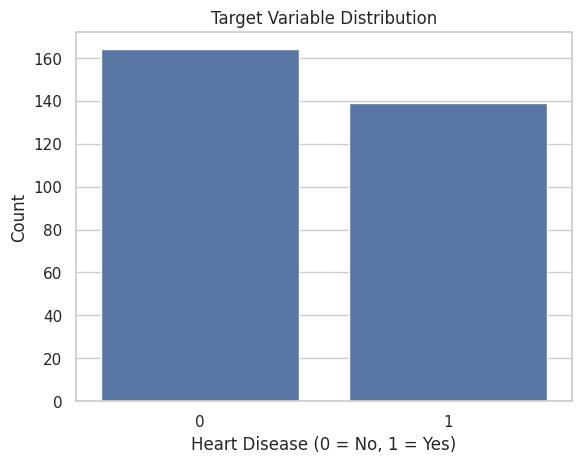

In [5]:
df["target"] = df["target"].apply(lambda x: 1 if x > 0 else 0)
df["target"].value_counts()
sns.countplot(x="target", data=df)
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Target Variable Distribution")
plt.show()

## Summary Statistics

Descriptive statistics provide insight into the range, central tendency,
and variability of numerical clinical features.


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


## Univariate Analysis

This section examines the distribution of key numerical features
to identify skewness, spread, and potential anomalies.


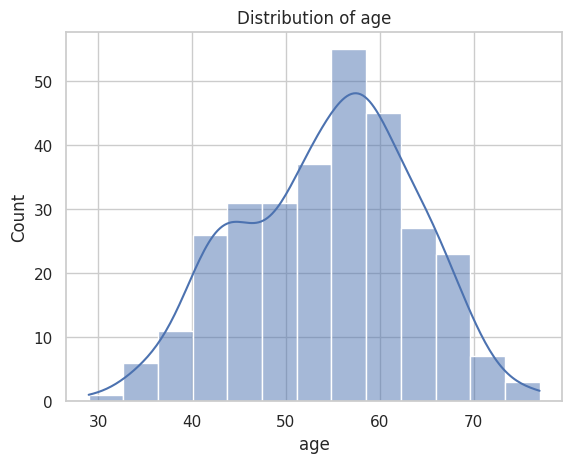

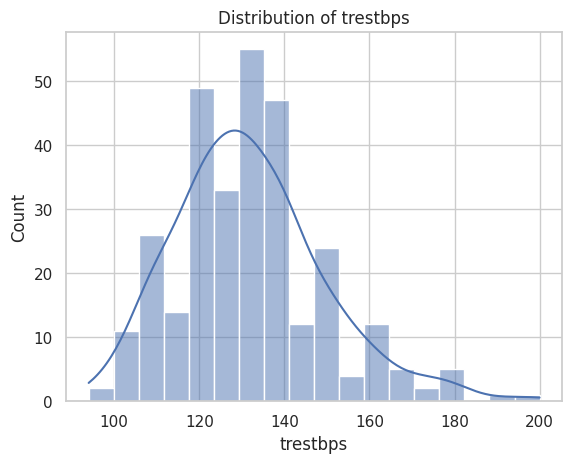

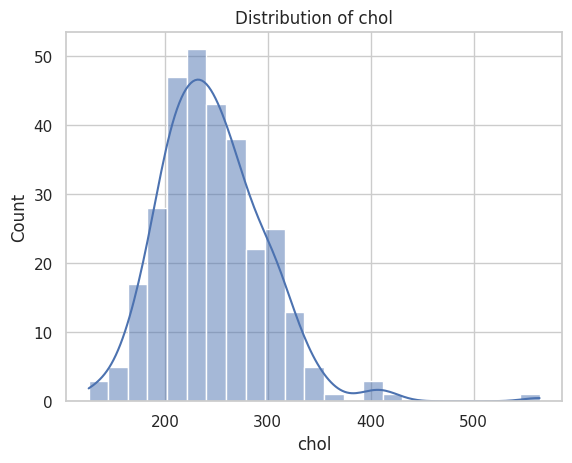

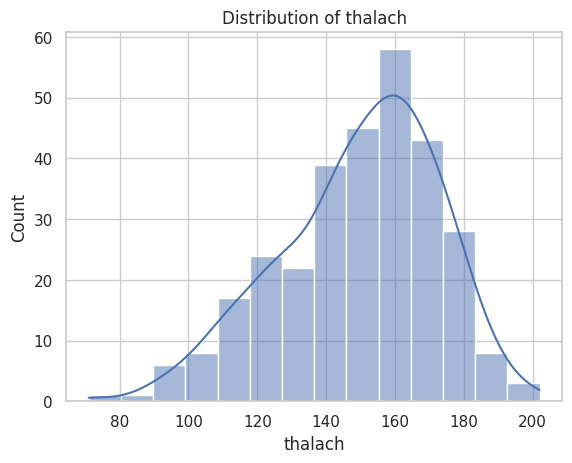

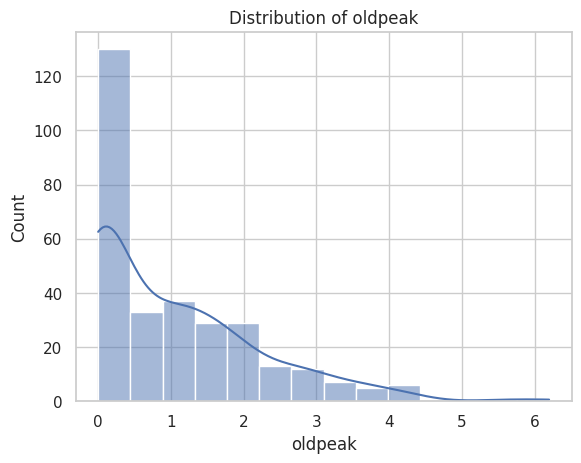

In [7]:
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]

for col in numerical_features:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


## Bivariate Analysis

Bivariate analysis explores the relationship between individual
features and the target variable to identify discriminative patterns.


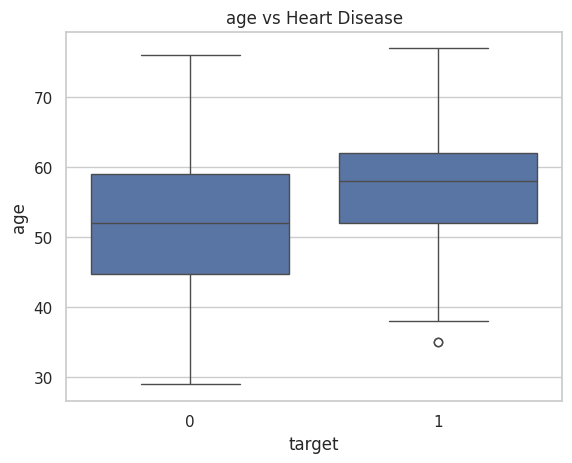

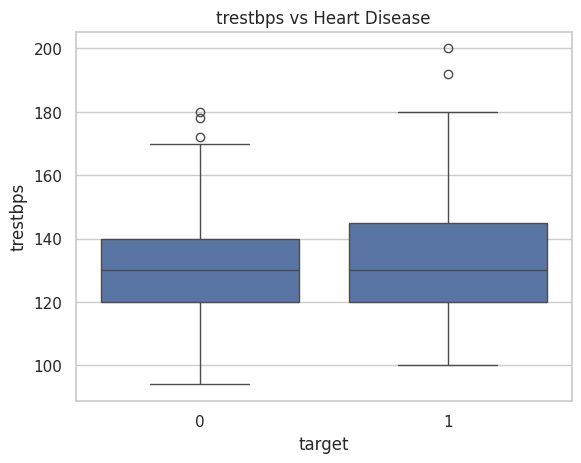

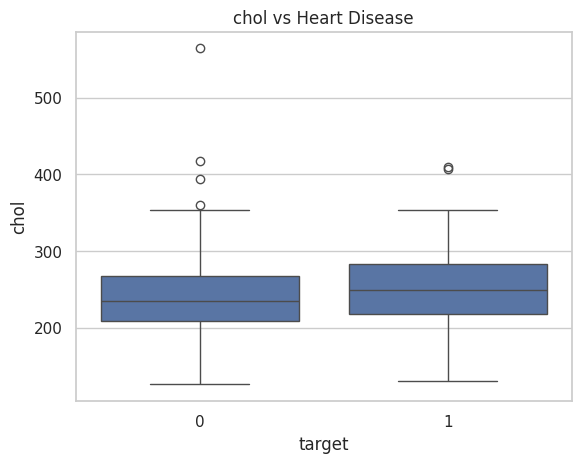

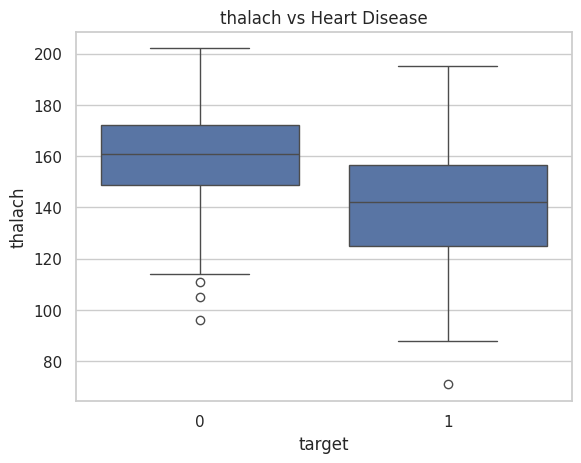

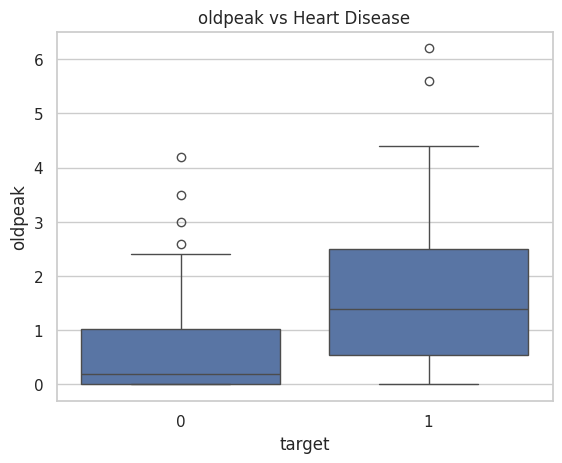

In [8]:
for col in numerical_features:
    plt.figure()
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} vs Heart Disease")
    plt.show()


## Categorical Features

Categorical variables are analysed to understand how their distributions
vary between patients with and without heart disease.


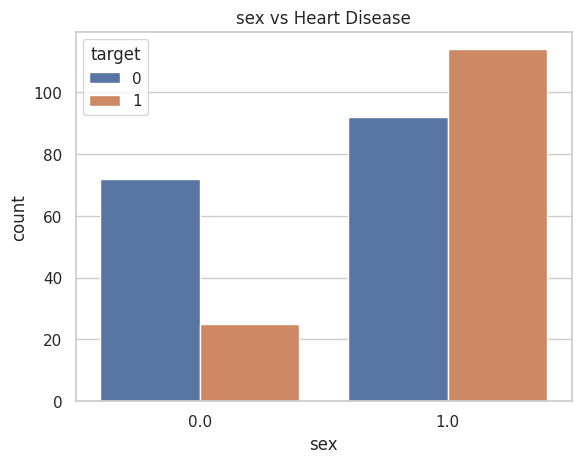

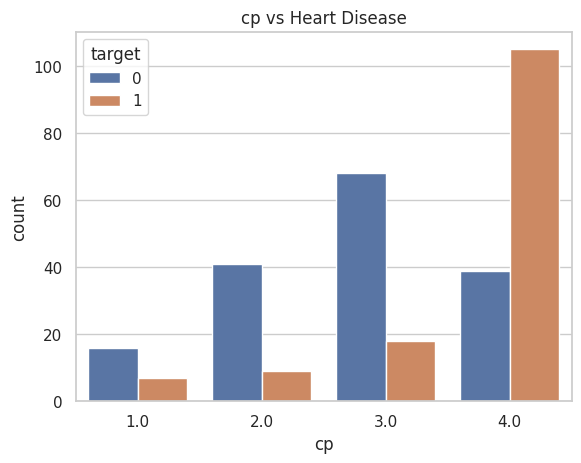

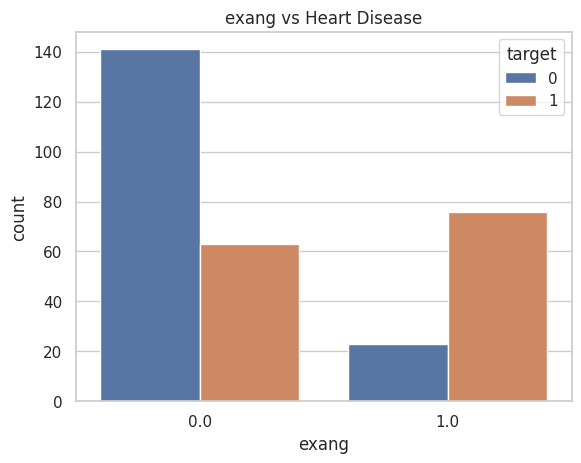

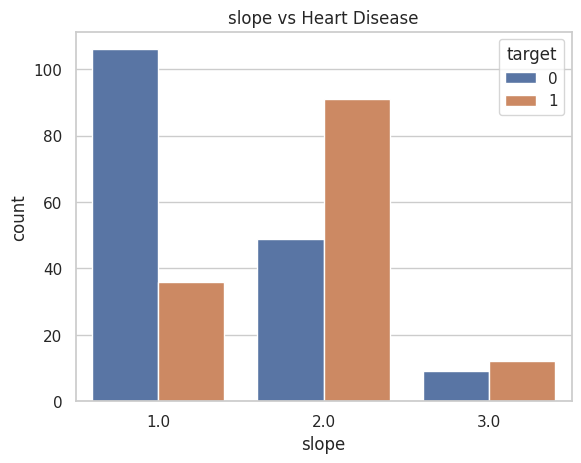

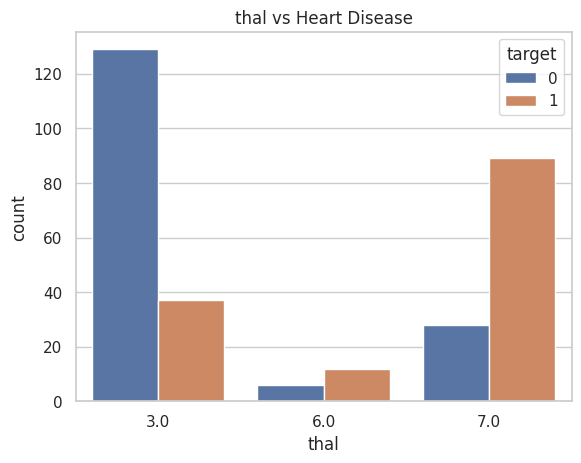

In [9]:
categorical_features = ["sex", "cp", "exang", "slope", "thal"]

for col in categorical_features:
    plt.figure()
    sns.countplot(x=col, hue="target", data=df)
    plt.title(f"{col} vs Heart Disease")
    plt.show()


## Correlation Analysis

Correlation analysis is performed to identify linear relationships
between numerical features and assess potential multicollinearity.


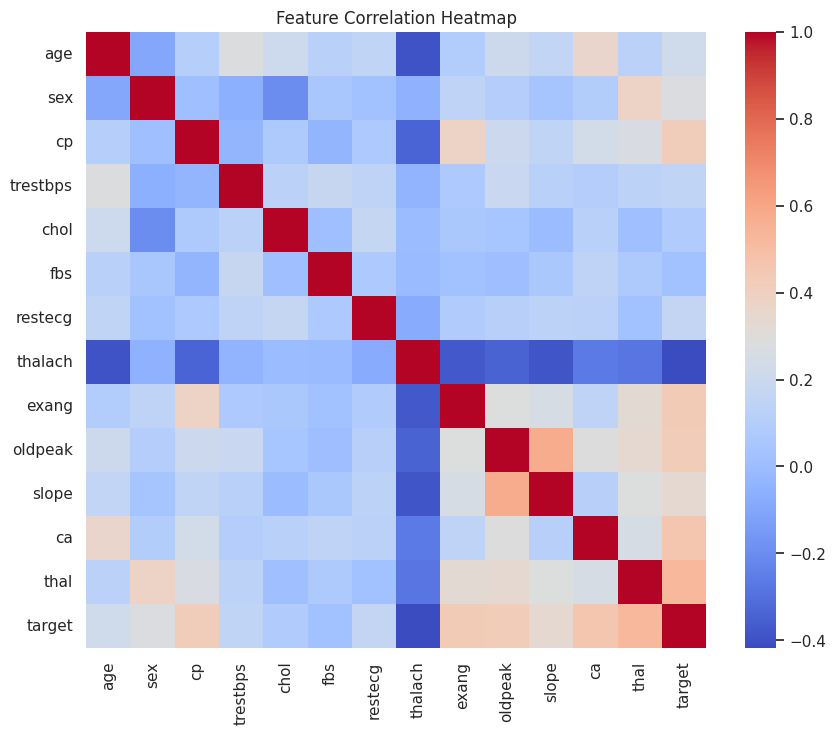

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

## Outlier Analysis

Outliers are examined to determine whether extreme values represent
measurement errors or clinically meaningful cases.


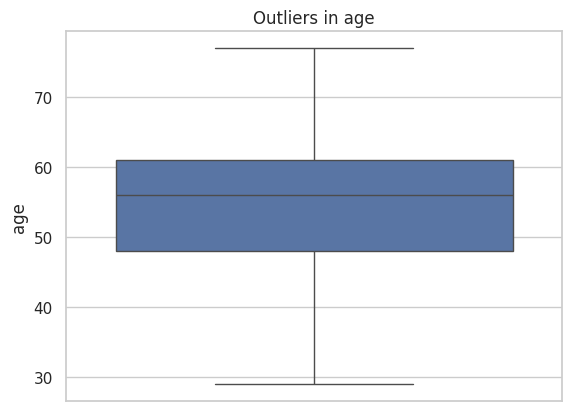

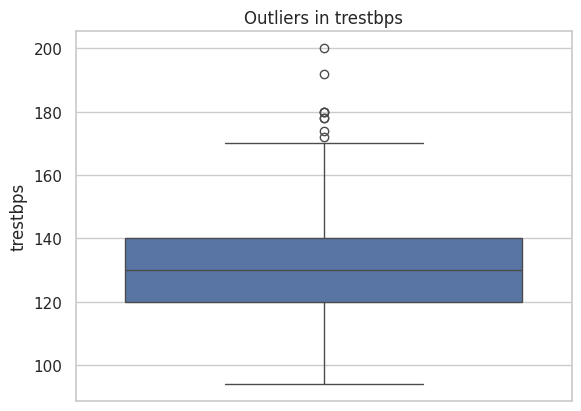

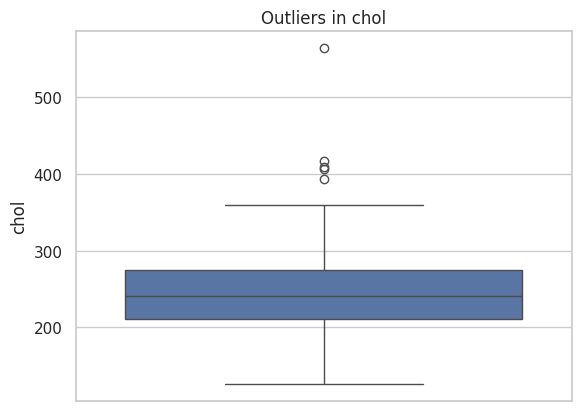

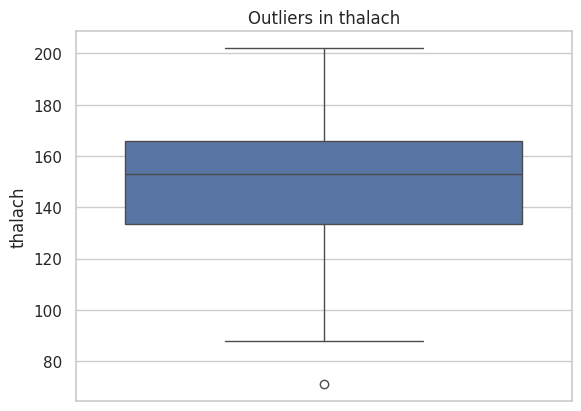

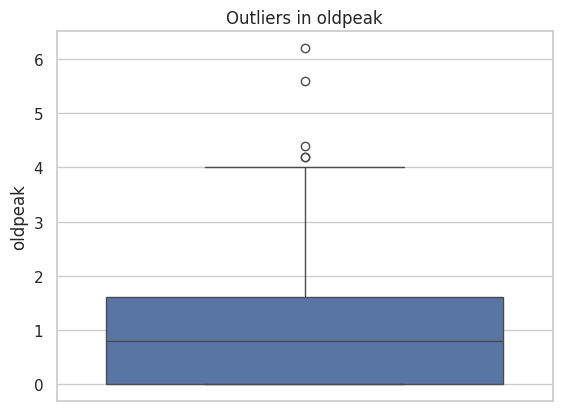

In [11]:
for col in numerical_features:
    plt.figure()
    sns.boxplot(y=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

## EDA Summary

The exploratory analysis highlights key differences between patients
with and without heart disease, particularly in features such as
maximum heart rate and ST depression.

These findings inform preprocessing choices, model selection, and
the use of explainable AI techniques in subsequent stages of the project.


# Machine Learning Modelling and Explainability

This section presents the development and evaluation of multiple machine
learning models for heart disease risk prediction. A baseline Logistic
Regression model is implemented first, followed by more complex ensemble
models. Finally, explainable AI techniques are applied to interpret model
predictions.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Baseline Model: Logistic Regression

Logistic Regression is used as a baseline model due to its simplicity,
interpretability, and common use in medical risk prediction tasks.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Impute missing values with the mean before scaling
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Re-apply scaling on the imputed data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)
y_prob_lr = log_reg.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, y_prob_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8524590163934426
Logistic Regression ROC-AUC: 0.9491341991341992
              precision    recall  f1-score   support

           0       0.93      0.79      0.85        33
           1       0.79      0.93      0.85        28

    accuracy                           0.85        61
   macro avg       0.86      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



## Random Forest Model

Random Forest is an ensemble learning method that improves predictive
performance by combining multiple decision trees while reducing overfitting.

In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, y_prob_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8852459016393442
Random Forest ROC-AUC: 0.9469696969696969
              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



## XGBoost Model

XGBoost is a gradient boosting algorithm known for its strong predictive
performance on structured tabular data.

In [16]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=4,
    random_state=42,
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost ROC-AUC:", roc_auc_score(y_test, y_prob_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8360655737704918
XGBoost ROC-AUC: 0.9199134199134199
              precision    recall  f1-score   support

           0       0.93      0.76      0.83        33
           1       0.76      0.93      0.84        28

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.84        61
weighted avg       0.85      0.84      0.84        61



## Model Performance Comparison

The models are compared using accuracy and ROC-AUC scores. While more complex
models such as Random Forest and XGBoost may achieve higher predictive
performance, they are inherently less interpretable than Logistic Regression.
This motivates the use of explainable AI techniques.

## Explainable AI Using SHAP

SHAP (SHapley Additive exPlanations) is used to interpret the predictions of
complex models by quantifying the contribution of each feature to the model
output.

In [18]:
import shap

explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)

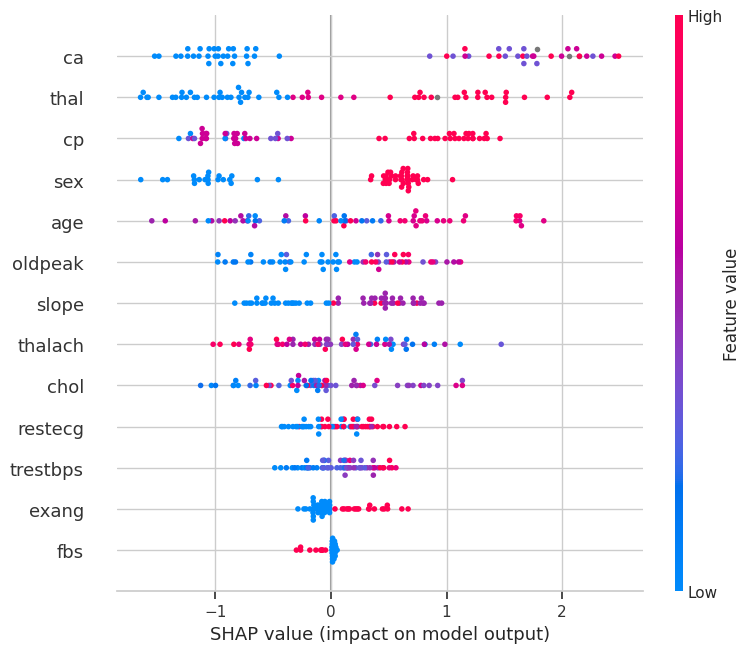

In [19]:
shap.summary_plot(shap_values, X_test)

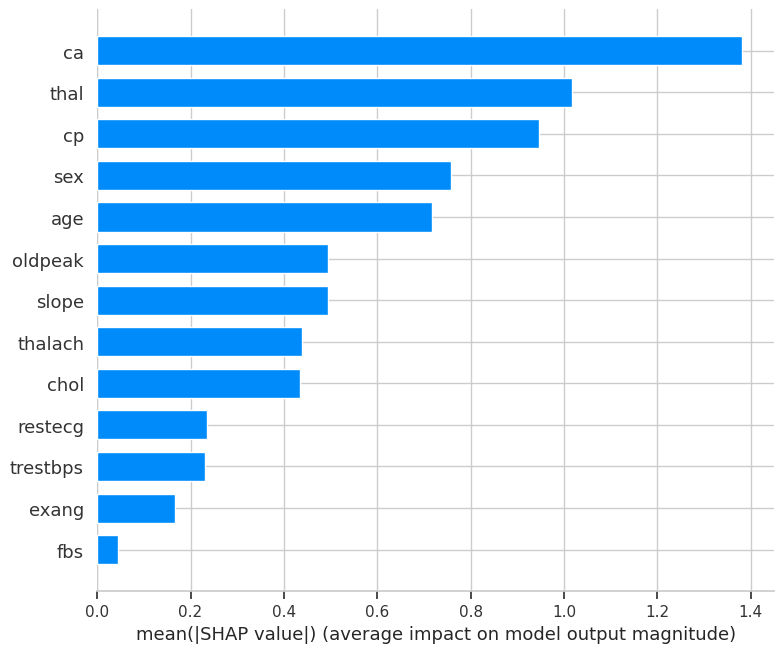

In [20]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

## Interpretation of SHAP Results

The SHAP analysis highlights key clinical features such as maximum heart rate,
ST depression, and chest pain type as influential factors in heart disease
prediction. These findings are consistent with established clinical knowledge
and enhance the transparency of the machine learning models.

## Modelling Summary

This section demonstrated that while advanced models improve predictive
performance, explainable AI techniques such as SHAP help bridge the gap
between accuracy and interpretability. These insights are critical for the
potential application of machine learning models in healthcare decision
support systems.